In [103]:
'''Ignore deprecation warnings'''
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning) 
warnings.filterwarnings('ignore', category = FutureWarning) 

''' Import required modules'''
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics


In [104]:
'''Customize visualization.'''
plt.style.use('seaborn-dark')       # Use bmh's style for plotting
sns.set_style({'axes.grid':False})  # Removes gridlines
sns.set_style('dark')

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def mkdown(string):
    display(Markdown(string))

In [105]:
'''Read and preview the train data from csv file.'''
train = pd.read_csv('train.csv')
mkdown('**Preview of Train Data:**')
display(train.head(3))

'''Read and preview the test from csv file.'''
test = pd.read_csv('test.csv')
mkdown('**Preview of Test Data:**')
display(test.head(3))

mkdown('**Shape of Train Data:**')
display(train.shape)

mkdown('**Shape of Test Data:**')
display(test.shape)

mkdown('**Description of Train Data:**')
display(train.describe())

mkdown('**Description of Test Data:**')
display(test.describe())

mkdown('**Missing Values in Test Data:**')
display(train.isna().sum())

mkdown('**Description of Test Data:**')
display(test.isna().sum())

**Preview of Train Data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Preview of Test Data:**

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


**Shape of Train Data:**

(891, 12)

**Shape of Test Data:**

(418, 11)

**Description of Train Data:**

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Description of Test Data:**

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Missing Values in Test Data:**

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Description of Test Data:**

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [106]:
'''Merging Training and Test Data together for cleaning and transforming'''
merged = pd.concat([train, test], sort = False)
mkdown('**Preview of Merged Data:**')
display(merged.head(3))

mkdown('**Shape of Merged Data**')
display(merged.shape)

mkdown('**Description of Merged Data:**')
display(merged.describe())

mkdown('**Missing Values in Merged Data:**')
display(merged.isna().sum())

**Preview of Merged Data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Shape of Merged Data**

(1309, 12)

**Description of Merged Data:**

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


**Missing Values in Merged Data:**

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Categorical and Numerical Variables
**Categorical Variables**: Survived, Sex, Pclass (ordinal), Embarked, Cabin, Name, Ticket, Sibsp, and Parch

**Numerical Variables**: Fare, Age, and PassengerId.

## Univariate Analysis
We will be analyzing the following:
- Pclass

In [107]:
'''To analyse categorical variables, we will create three custom functions.
The first two functions displays bar labels in absolute and relative scale respectively. And the 3rd one creates a dataframe of absolute and relative and also generates abs and relative frequency plot for each variable.'''

''' #1.Function for displaying bar labels in absolute scale.'''
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Absolute Frequency', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([])
    
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
    
'''#2.Function for displaying bar lebels in relative scale.'''
def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
         
'''#3.Function to create a dataframe of absolute and relative frequency of each variable. And plot absolute and relative frequency.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    # Was multiplied by 100 and rounded to 2 decimal points for percentage.
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    print('Absolute & Relative Frequency of',variable.name,':')
    display(df)
    
    # This portion plots absolute frequency with bar labeled.
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = 'Absolute Frequency of %s' %variable.name, figsize = fig_size)
    ax.title.set_size(title_size)
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar(title = 'Relative Frequency of %s' %variable.name, figsize = fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels() # Displays bar labels in relative scale.
    plt.show()

Absolute & Relative Frequency of Sex :


,Absolute Frequency,Relative Frequency(%)
male,843,64.4
female,466,35.6


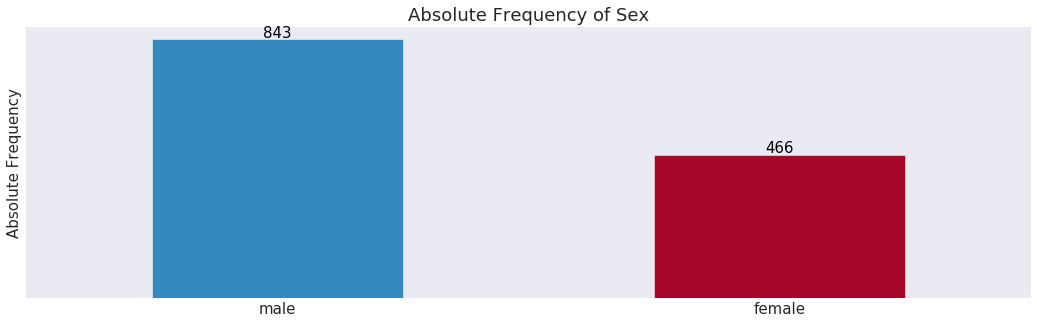

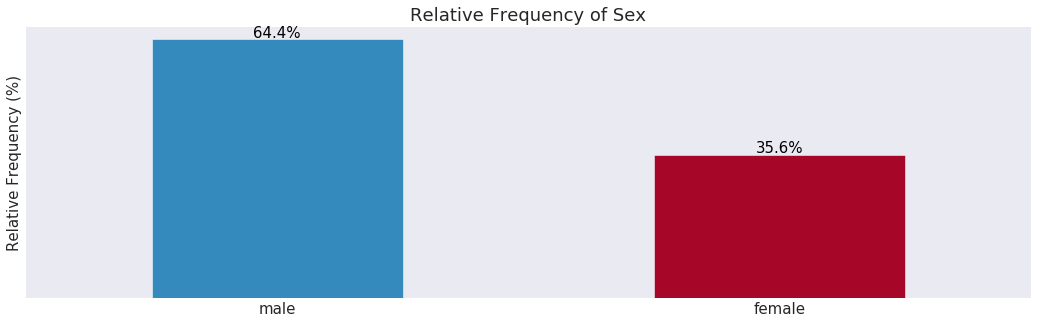

In [108]:
absolute_and_relative_freq(merged.Sex)

Absolute & Relative Frequency of Survived :


,Absolute Frequency,Relative Frequency(%)
0.0,549,61.62
1.0,342,38.38


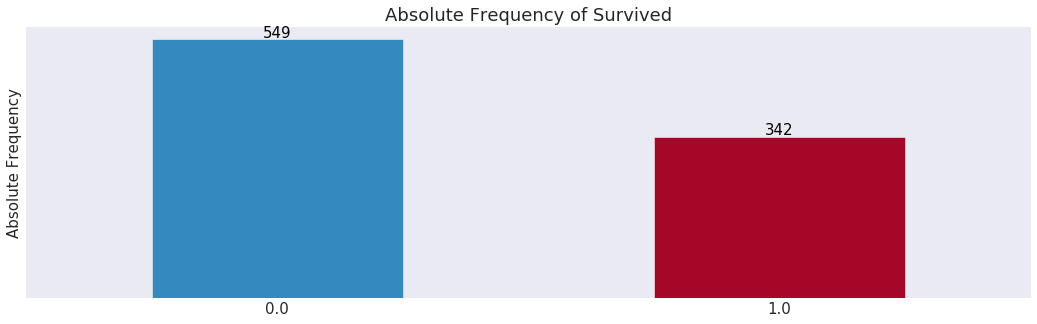

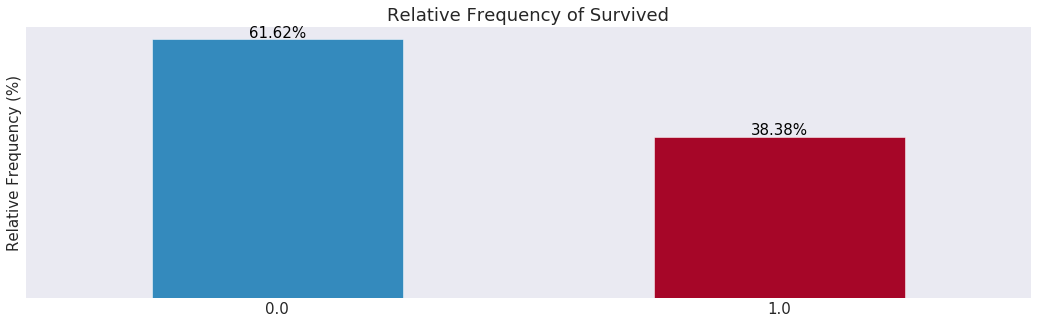

In [109]:
absolute_and_relative_freq(merged.Survived)

Absolute & Relative Frequency of Pclass :


,Absolute Frequency,Relative Frequency(%)
3,709,54.16
1,323,24.68
2,277,21.16


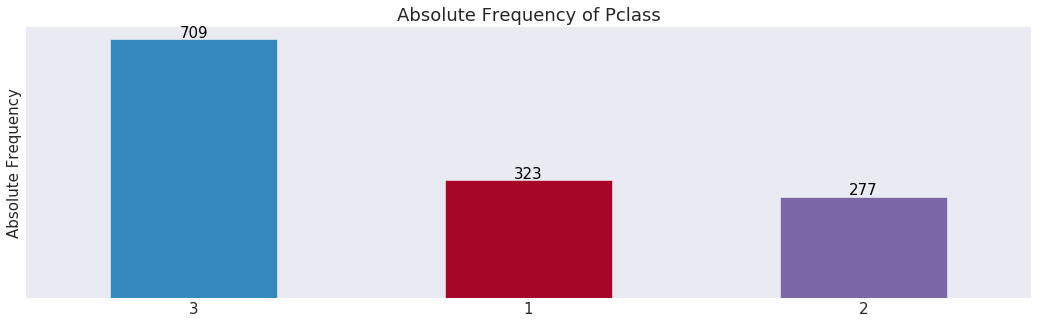

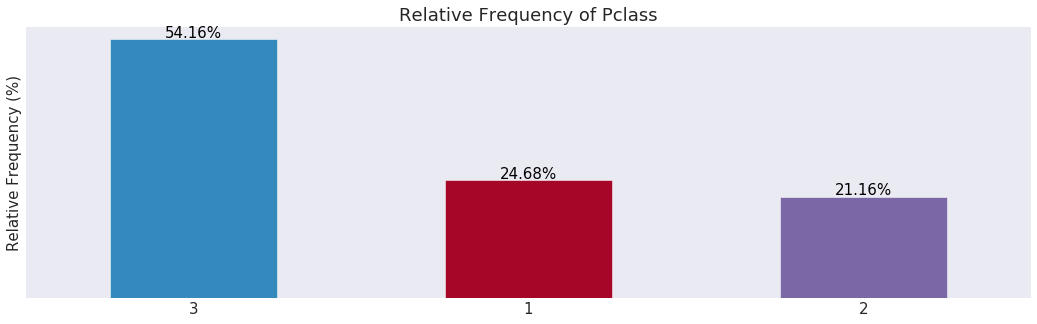

In [110]:
absolute_and_relative_freq(merged.Pclass)

In [111]:
merged.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Absolute & Relative Frequency of Embarked :


,Absolute Frequency,Relative Frequency(%)
S,914,69.93
C,270,20.66
Q,123,9.41


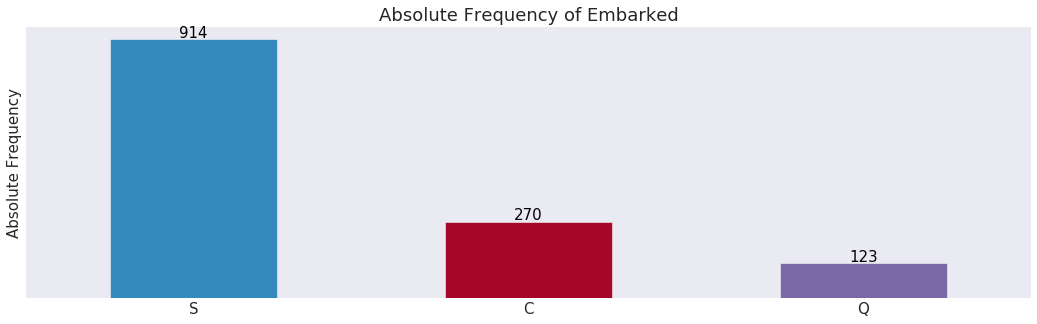

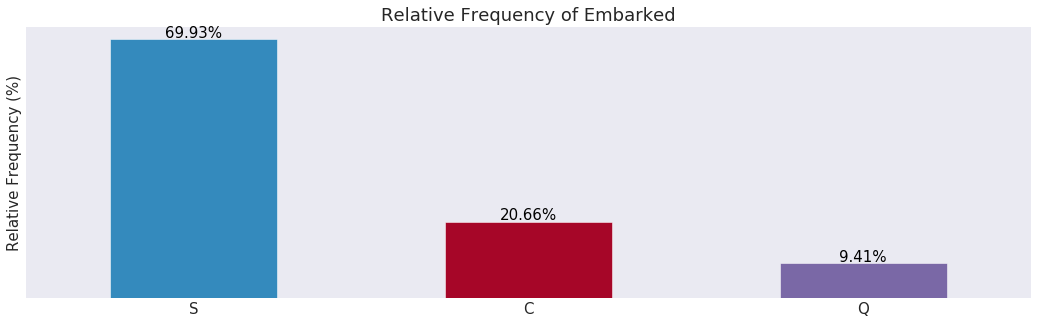

In [112]:
absolute_and_relative_freq(merged.Embarked)

Absolute & Relative Frequency of SibSp :


,Absolute Frequency,Relative Frequency(%)
0,891,68.07
1,319,24.37
2,42,3.21
4,22,1.68
3,20,1.53
8,9,0.69
5,6,0.46


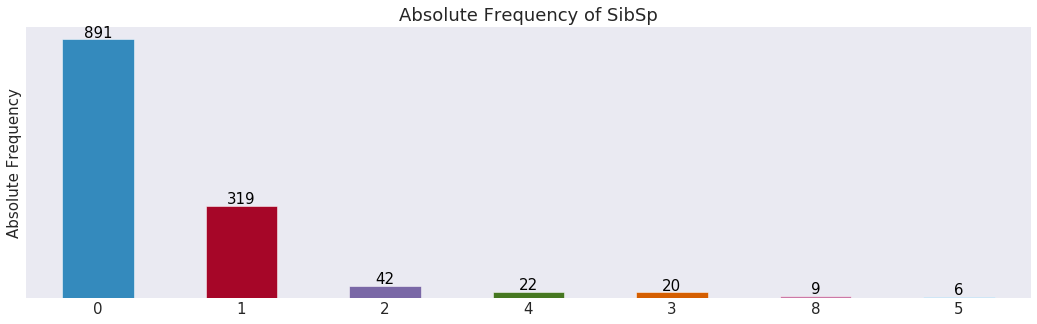

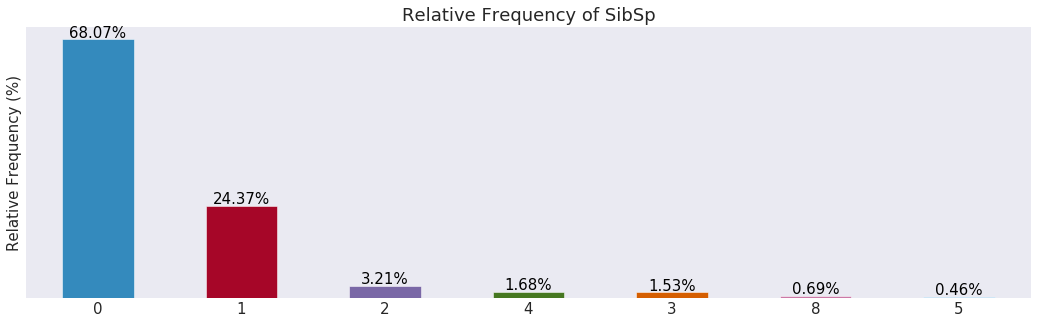

In [113]:
absolute_and_relative_freq(merged.SibSp)

Absolute & Relative Frequency of Parch :


,Absolute Frequency,Relative Frequency(%)
0,1002,76.55
1,170,12.99
2,113,8.63
3,8,0.61
5,6,0.46
4,6,0.46
9,2,0.15
6,2,0.15


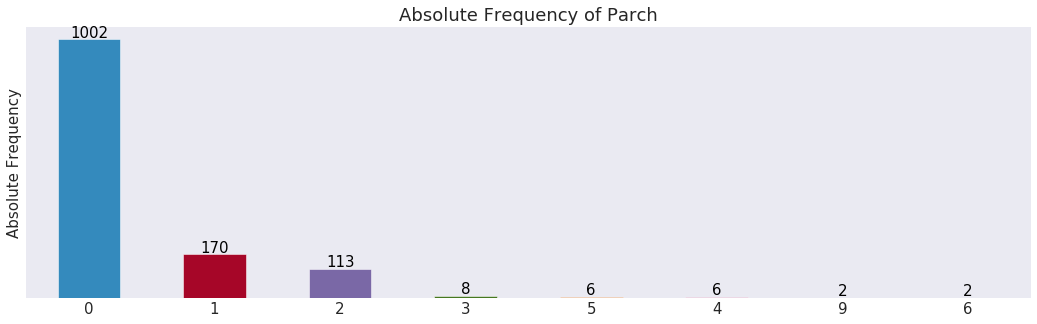

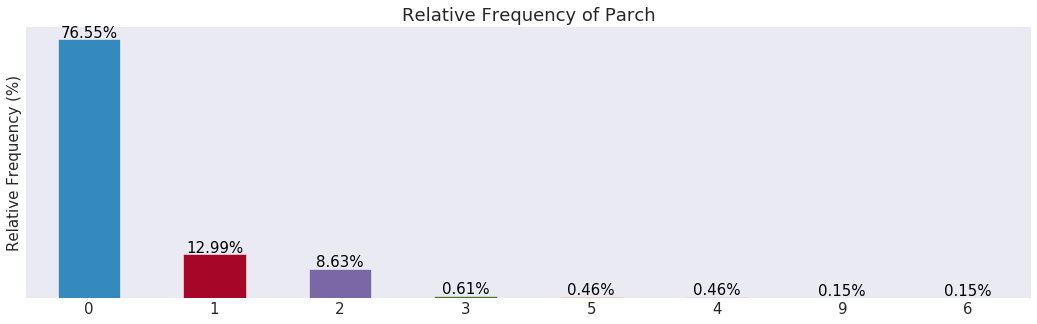

In [114]:
absolute_and_relative_freq(merged.Parch)

In [115]:
mkdown('** Cabins **')
cabin_count = merged.Cabin.value_counts(dropna = False)
display(cabin_count.head(5))

mkdown('** Total Categories in Cabins **')
display(cabin_count.count())

** Cabins **

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
C78                   4
Name: Cabin, dtype: int64

** Total Categories in Cabins **

187

In [116]:
mkdown('** Names **')
name_count = merged.Name.value_counts(dropna = False)
display(name_count.head(5))

mkdown('** Total Categories in Names **')
display(name_count.count())

** Names **

Kelly, Mr. James           2
Connolly, Miss. Kate       2
McKane, Mr. Peter David    1
Wells, Miss. Joan          1
Caram, Mr. Joseph          1
Name: Name, dtype: int64

** Total Categories in Names **

1307

In [117]:
mkdown('** Tickets **')
ticket_count = merged.Ticket.value_counts(dropna = False)
display(ticket_count.head(5))

mkdown('** Total Categories in Tickets **')
display(ticket_count.count())

** Tickets **

CA. 2343    11
CA 2144      8
1601         8
PC 17608     7
347082       7
Name: Ticket, dtype: int64

** Total Categories in Tickets **

929

Absolute & Relative Frequency of SibSp :


,Absolute Frequency,Relative Frequency(%)
0,891,68.07
1,319,24.37
2,42,3.21
4,22,1.68
3,20,1.53
8,9,0.69
5,6,0.46


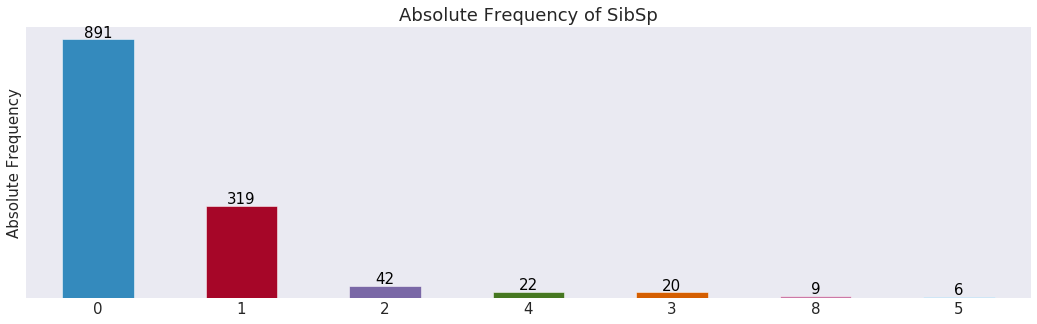

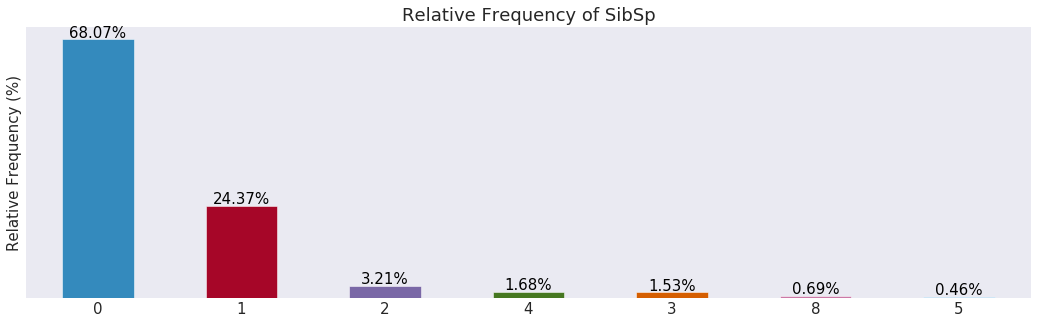

In [118]:
absolute_and_relative_freq(merged.SibSp)

Absolute & Relative Frequency of Parch :


,Absolute Frequency,Relative Frequency(%)
0,1002,76.55
1,170,12.99
2,113,8.63
3,8,0.61
5,6,0.46
4,6,0.46
9,2,0.15
6,2,0.15


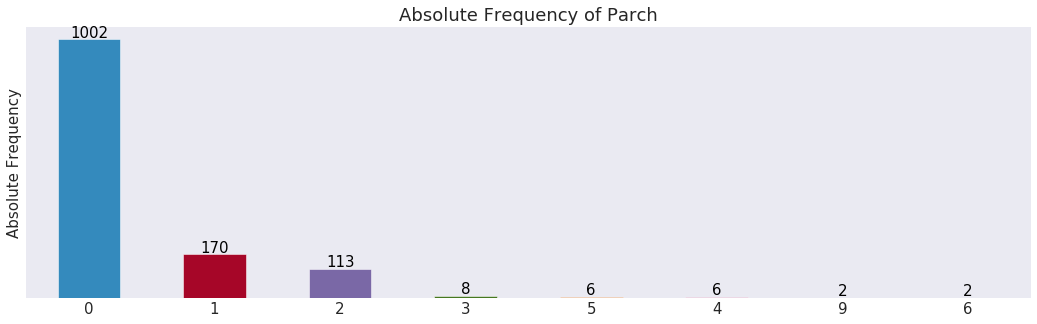

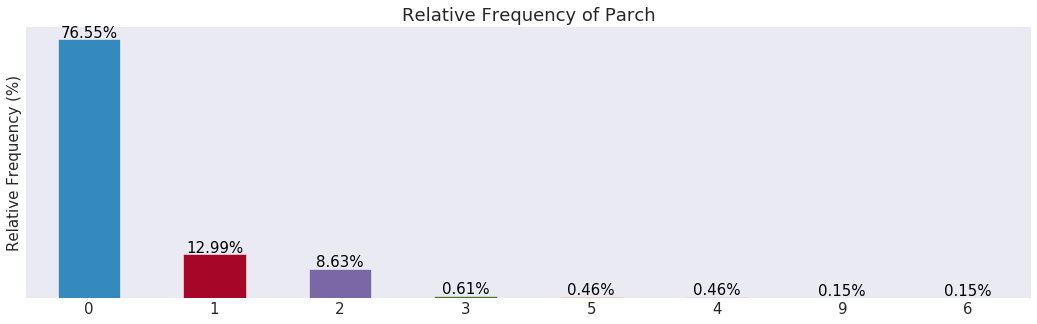

In [119]:
absolute_and_relative_freq(merged.Parch)

In [120]:
merged.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [121]:
'''To analyse numerical variables, we will create three custom functions.
The 1st one will plot histogram for each numerical variable. The 2nd function will plot kernel density plot.And the third one will calculate skewness and '''

'''#1.Plot histogram.'''
def histogram(variable):
    global ax
    font_size = 15
    fig_size = (18, 7)
    title_size = 18
    ax = variable.plot.hist(figsize = fig_size)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.title('%s' %variable.name + ' Distribution with Histogram', fontsize = title_size)
    abs_bar_labels()
    plt.show()
    
'''#2.Plot density plot .'''
def density_plot(variable):
    fig_size = (18, 7)
    font_size = 15
    title_size = 18
    plt.figure(figsize = fig_size)
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name, fontsize = font_size)
    plt.ylabel('Density', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title('%s ' %variable.name + 'Distribution with Density Plot & Histogram', fontsize = title_size)
    plt.show()
    
'''#3.Calculate descriptive statistics.'''
def summary_stats(variable):
    stats = variable.describe()
    skew = pd.Series(variable.skew(), index = ['skewness'])
    df_stats = pd.DataFrame(pd.concat([skew, stats], sort = False), columns = [variable.name])
    df_stats.index.name = 'Stats'
    display(df_stats)

** Histogram of Fare**

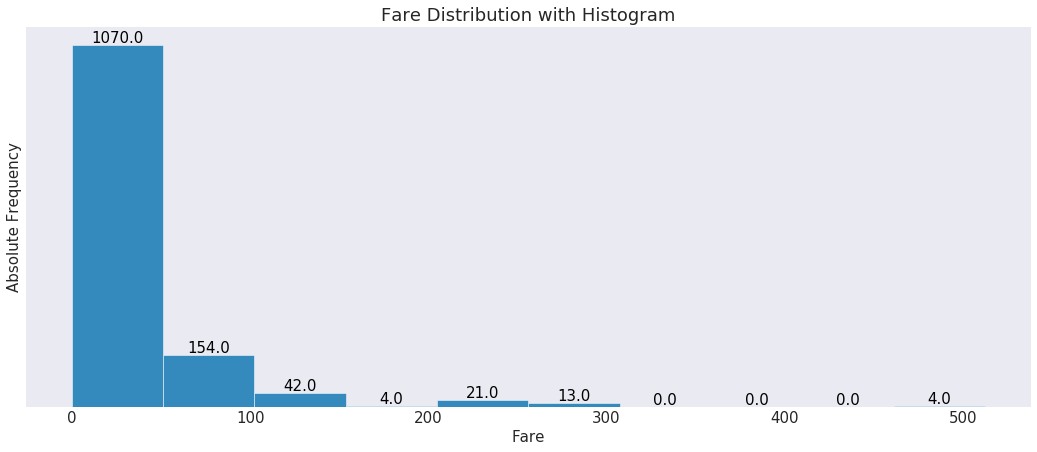

** Density Plot of Fare**

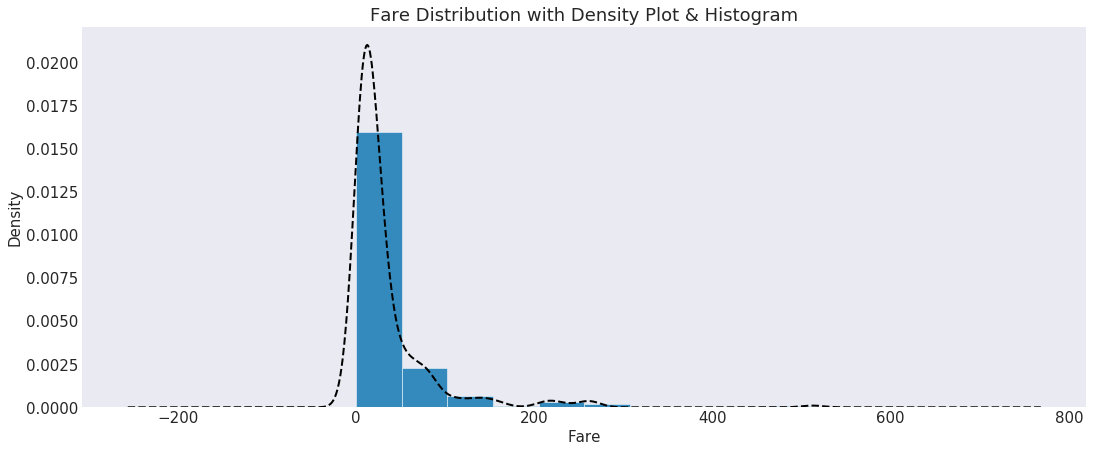

** Summary Stat of Fare**

,Fare
Stats,
skewness,4.367709
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [122]:
mkdown('** Histogram of Fare**')
histogram(merged.Fare)
mkdown('** Density Plot of Fare**')
density_plot(merged.Fare)
mkdown('** Summary Stat of Fare**')
summary_stats(merged.Fare)

** Histogram of Age**

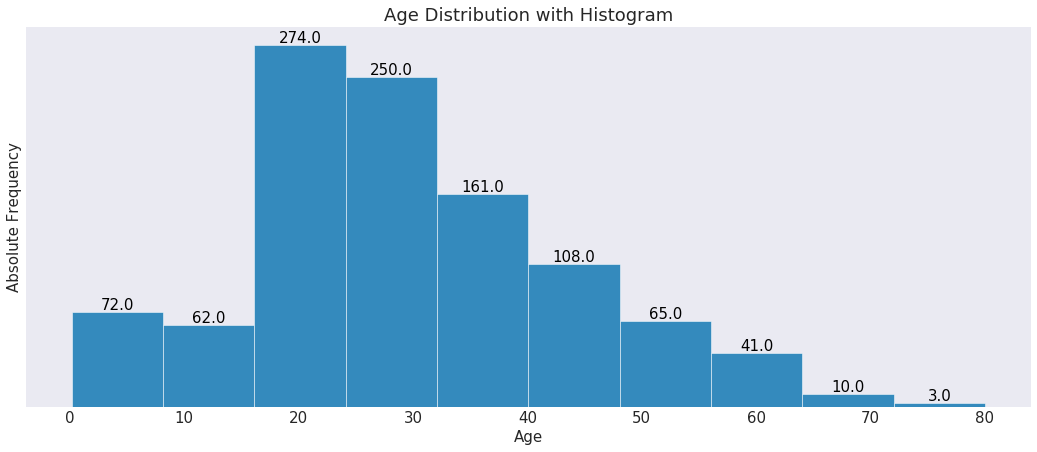

** Density Plot of Age**

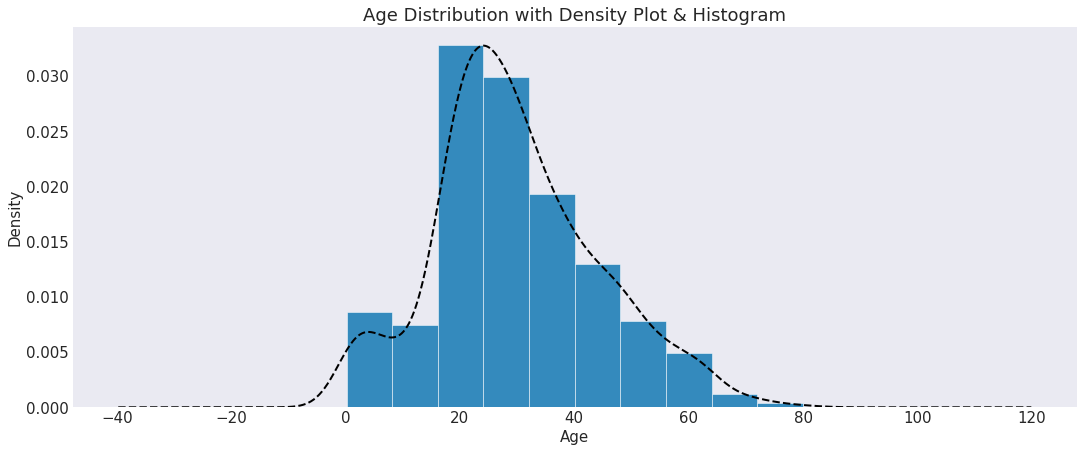

** Summary Stat of Age**

,Age
Stats,
skewness,0.407675
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [123]:
mkdown('** Histogram of Age**')
histogram(merged.Age)
mkdown('** Density Plot of Age**')
density_plot(merged.Age)
mkdown('** Summary Stat of Age**')
summary_stats(merged.Age)

## Feature Engineering

In [93]:
merged.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [124]:
mkdown('**Null Values in Cabin**')
display(merged.Cabin.isna().sum())
mkdown('**Categories in Cabins**')
display(merged.Cabin.value_counts())

**Null Values in Cabin**

1014

**Categories in Cabins**

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
F4                 4
B96 B98            4
C22 C26            4
F2                 4
D                  4
F33                4
A34                3
C101               3
E101               3
E34                3
B51 B53 B55        3
B58 B60            3
C52                2
B20                2
B35                2
D19                2
E44                2
E67                2
B45                2
D36                2
C123               2
C125               2
E24                2
D20                2
B49                2
B5                 2
                  ..
B37                1
E17                1
C91                1
C118               1
D9                 1
E38                1
C132               1
B101               1
C97                1
B42                1
C148               1
D46                1
B86                1
E12                1
B102               1
A24                1
A26          

In [127]:
'''Change NaNs to a new category X'''
merged.Cabin.fillna(value = 'X', inplace = True)
'''Keep only the 1st character where Cabin is alphanumerical.'''
merged.Cabin = merged.Cabin.apply(lambda x : x[0])
mkdown('**Categories in Cabins**')
display(merged.Cabin.value_counts())

**Categories in Cabins**

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

Absolute & Relative Frequency of Cabin :


,Absolute Frequency,Relative Frequency(%)
X,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


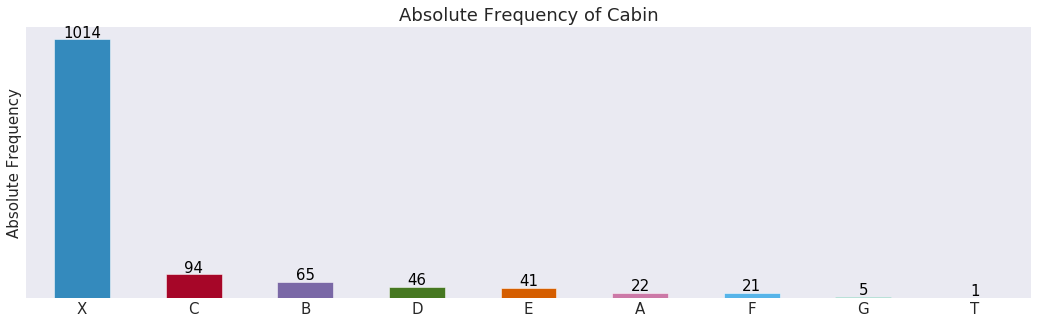

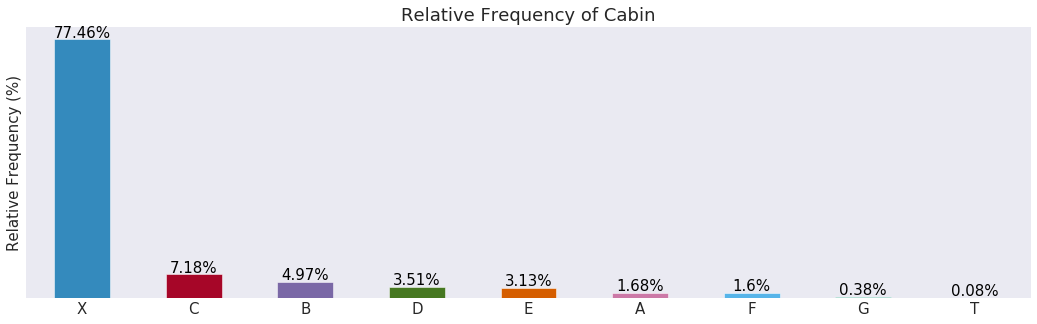

In [128]:
absolute_and_relative_freq(merged.Cabin)

### Process Name

In [129]:
# How does this work? Match anything that has any upper-case, lower-case word, but ends with a period
'''Create a new variable Title that extracts titles from Name.'''
merged['Title'] = merged.Name.str.extract('([A-Za-z]+)\.')
'''Count the extracted categories of Title from Name.'''
display(merged.Title.value_counts())


Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Jonkheer      1
Lady          1
Capt          1
Countess      1
Dona          1
Sir           1
Don           1
Mme           1
Name: Title, dtype: int64

In [137]:
merged['Title'][merged['Title'].isin(['Dr', 'Rev', 'Col', 'Major', 'Capt'])] = 'Officer'
merged['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aritocrat', inplace = True)
'''Finally Replace Mlle and Ms with Miss. And Mme with Mrs.'''
merged.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Distribution of Titles

Absolute & Relative Frequency of Title :


,Absolute Frequency,Relative Frequency(%)
Mr,757,57.83
Miss,264,20.17
Mrs,198,15.13
Master,61,4.66
Officer,23,1.76
Aritocrat,6,0.46


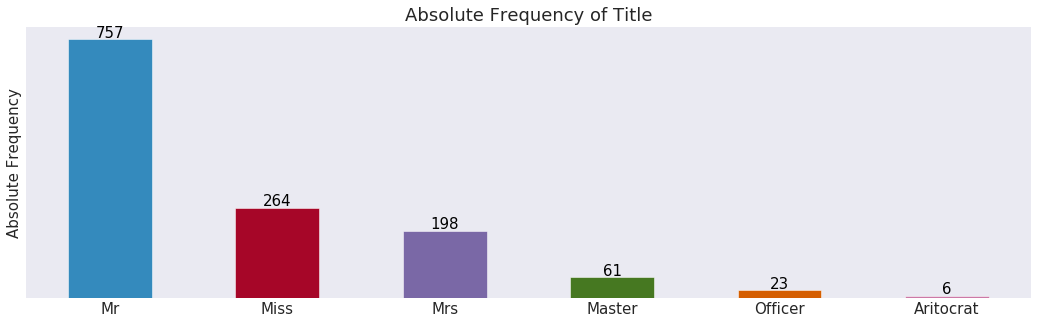

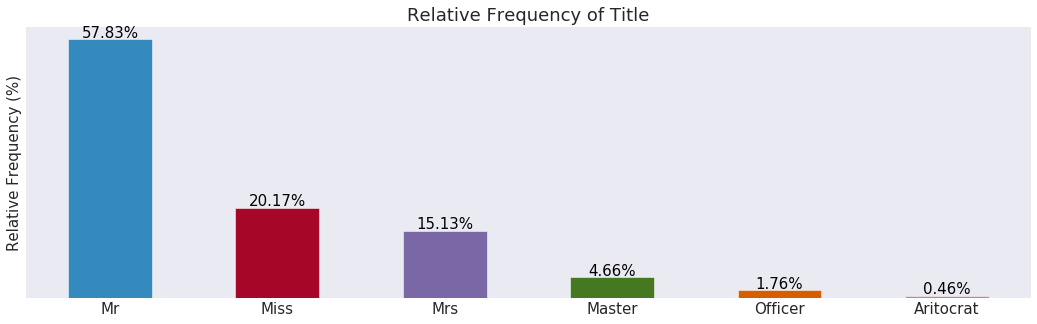

In [138]:
mkdown('Distribution of Titles')
absolute_and_relative_freq(merged.Title)

**Family Size Distribution**

Absolute & Relative Frequency of FamilySize :


,Absolute Frequency,Relative Frequency(%)
1,790,60.35
2,235,17.95
3,159,12.15
4,43,3.28
6,25,1.91
5,22,1.68
7,16,1.22
11,11,0.84
8,8,0.61


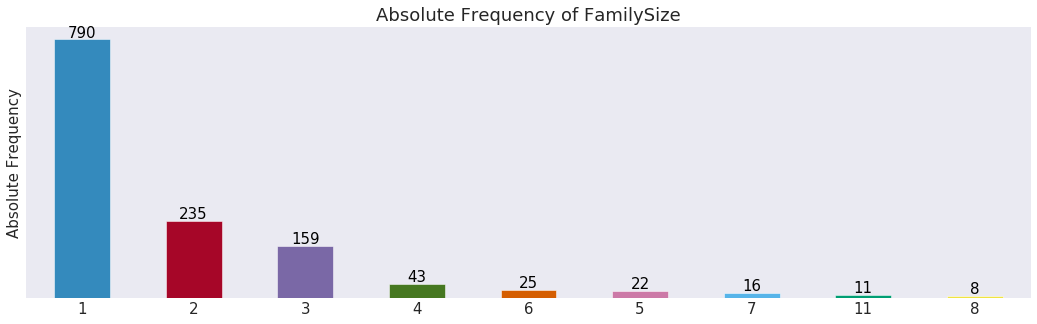

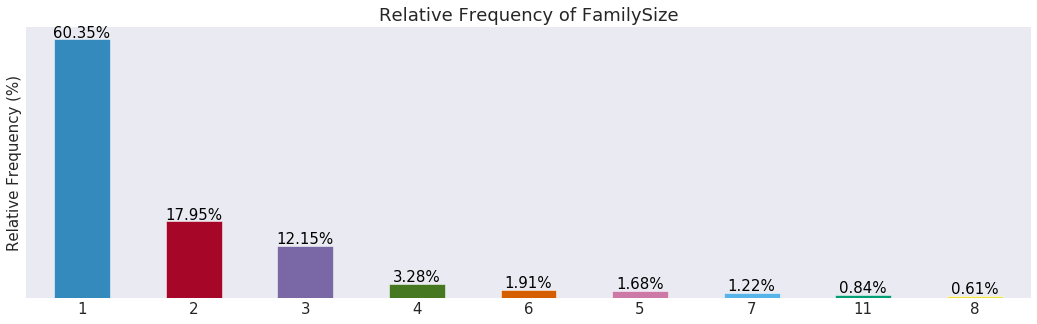

In [143]:
merged['FamilySize'] = merged['Parch'] + merged['SibSp'] + 1
mkdown('**Family Size Distribution**')
absolute_and_relative_freq(merged.FamilySize)

In [145]:
mkdown('**Ticket Distribution**')
merged.Ticket.value_counts()

**Ticket Distribution**

CA. 2343         11
CA 2144           8
1601              8
PC 17608          7
347082            7
S.O.C. 14879      7
347077            7
3101295           7
382652            6
19950             6
347088            6
113781            6
PC 17757          5
349909            5
113503            5
4133              5
W./C. 6608        5
16966             5
220845            5
230136            4
2666              4
LINE              4
PC 17760          4
SC/Paris 2123     4
W./C. 6607        4
C.A. 2315         4
PC 17755          4
24160             4
C.A. 34651        4
PC 17483          4
                 ..
343275            1
PP 4348           1
237393            1
244360            1
28206             1
2626              1
248723            1
31418             1
27042             1
349209            1
2658              1
342441            1
233478            1
F.C.C. 13531      1
C.A. 29178        1
365226            1
3101277           1
345777            1
341826            1


Absolute & Relative Frequency of Ticket :


,Absolute Frequency,Relative Frequency(%)
N,957,73.11
P,98,7.49
S,98,7.49
C,77,5.88
A,42,3.21
W,19,1.45
F,13,0.99
L,5,0.38


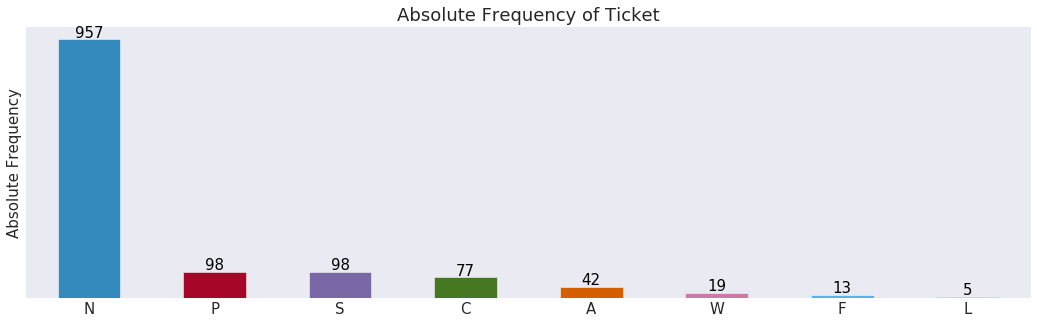

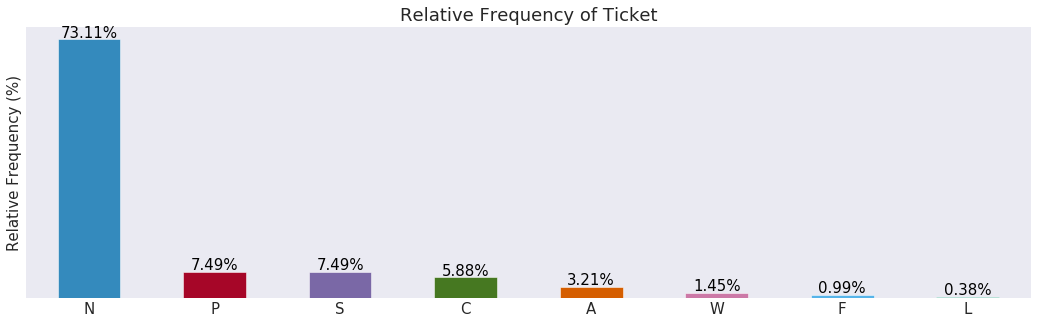

In [162]:
merged['Ticket'] = merged['Ticket'].apply(lambda x: 'N' if x[0].isdigit() else x[0])
absolute_and_relative_freq(merged.Ticket)

## Outlier Detection

**Values Missing in Each Variable:**

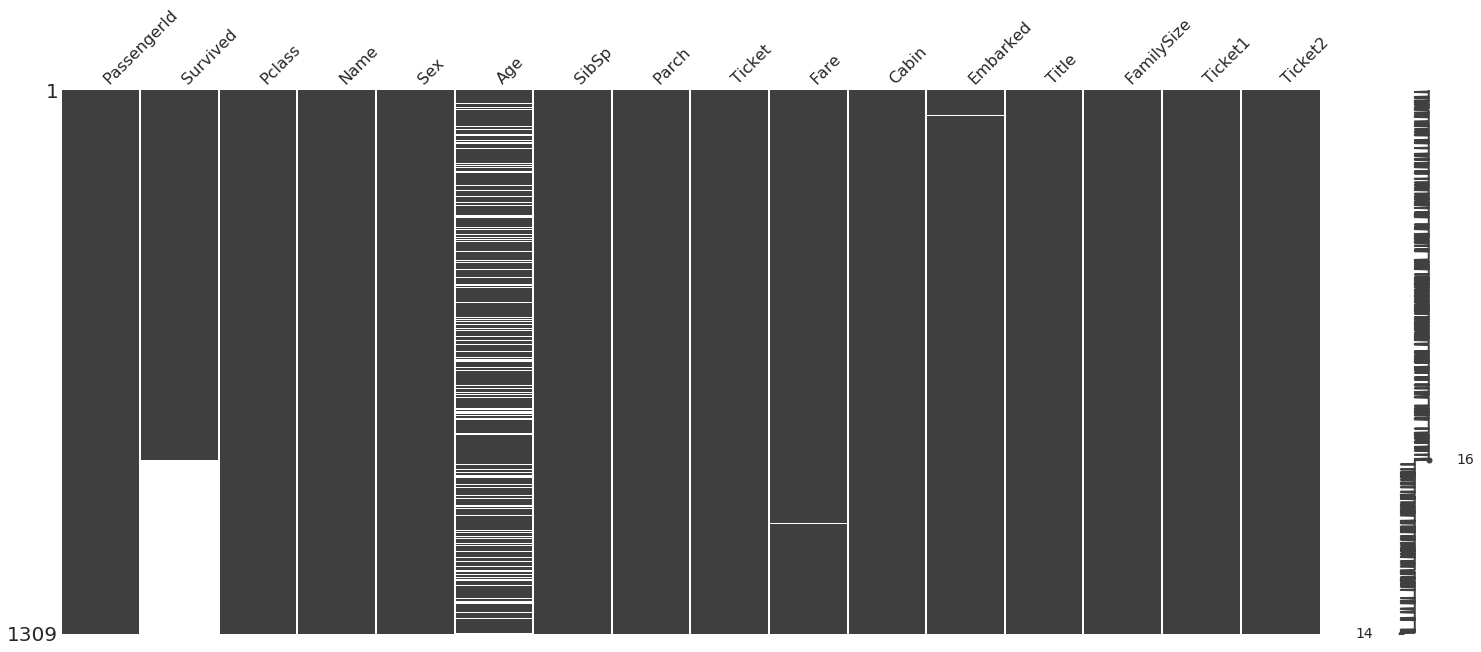

In [164]:
mkdown('**Values Missing in Each Variable:**')
mn.matrix(merged)

Absolute & Relative Frequency of Embarked :


,Absolute Frequency,Relative Frequency(%)
S,914,69.93
C,270,20.66
Q,123,9.41


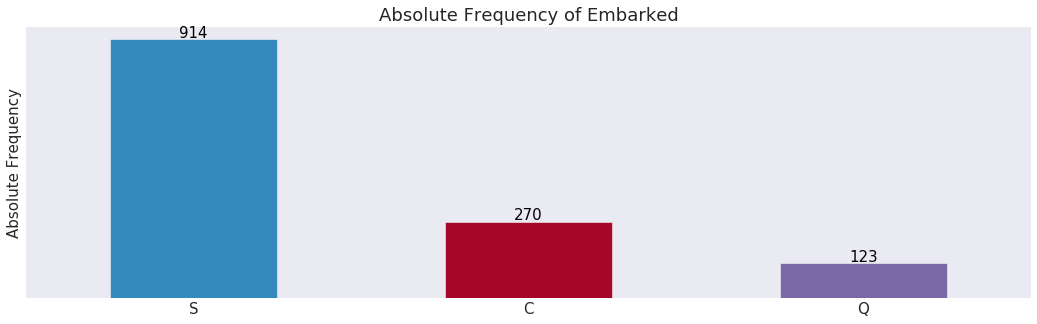

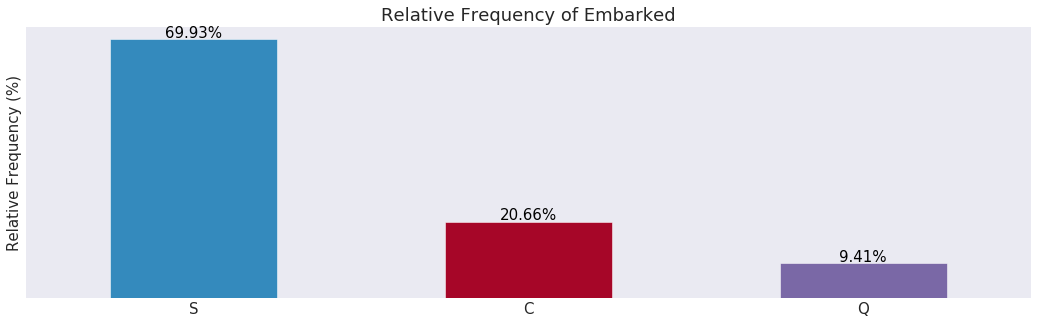

In [166]:
absolute_and_relative_freq(merged.Embarked)

In [167]:
merged['Embarked'].fillna(value = 'S', inplace = True)

In [168]:
mkdown('**Missing Values of Each Variable:**')
display(merged.isna().sum())

**Missing Values of Each Variable:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Title            0
FamilySize       0
Ticket1          0
Ticket2          0
dtype: int64

In [171]:
merged['Fare'].fillna(value = merged['Fare'].median(), inplace = True)

In [172]:
mkdown('**Missing Values of Each Variable:**')
display(merged.isna().sum())

**Missing Values of Each Variable:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
FamilySize       0
Ticket1          0
Ticket2          0
dtype: int64